<a href="https://colab.research.google.com/github/CHOTU-A/Ampili/blob/master/TensorFlowTweetTextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://github.com/rsreetech/TextClassificationNNTensorflow/blob/master/TensorFlowTweetTextClassification.ipynb

In [ ]:
!pip install  tensorflow_hub

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf

import tensorflow_hub as hub

from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import regularizers

from collections import Counter


import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt


import pydot

In [ ]:
print(tf.__version__)

2.8.2


In [ ]:
if tf.test.gpu_device_name(): 
    print('Default GPU Device:{}'.format(tf.test.gpu_device_name()))

else:
    print("Please install GPU version of TF")

Default GPU Device:/device:GPU:0


In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string


def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>3))]) 
    
    return text2.lower()

In [ ]:
train_data= pd.read_csv("/content/train.csv")
train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['text'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('===========Train Data =========')
print(train_data['sentiment'].value_counts())
print(len(train_data))
print('==============================')


train_data['text'] = train_data['text'].apply(remove_emoji)
train_data['text'] = train_data['text'].apply(remove_url)
train_data['text'] = train_data['text'].apply(clean_text)


test_data= pd.read_csv("/content/test.csv")
test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_text'] = test_data['text'].apply(lambda x:len(str(x).split())) 
mask = test_data['Num_words_text'] >2
test_data = test_data[mask]
print('===========Test Data =========')
print(test_data['sentiment'].value_counts())
print(len(test_data))
print('==============================')

test_data['text'] = test_data['text'].apply(remove_emoji)
test_data['text'] = test_data['text'].apply(remove_url)
test_data['text'] = test_data['text'].apply(clean_text)

===========Train Data =========
neutral     10704
positive     8375
negative     7673
Name: sentiment, dtype: int64
26752
===========Test Data =========
neutral     1376
positive    1075
negative     983
Name: sentiment, dtype: int64
3434


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['text'].tolist(), train_data['sentiment'].tolist(), test_size=0.33,stratify = train_data['sentiment'].tolist(), random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution: '+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution: '+ str(Counter(y_valid)))




x_train=np.asarray(X_train)
x_valid = np.array(X_valid)
x_test =np.asarray(test_data['text'].tolist())

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))

valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

test_labels = le.transform(test_data['sentiment'].tolist())
test_labels = np.asarray(tf.keras.utils.to_categorical(test_labels))
list(le.classes_)


train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:17923
Class distribution: Counter({'neutral': 7171, 'positive': 5611, 'negative': 5141})
Valid data len:8829
Class distribution: Counter({'neutral': 3533, 'positive': 2764, 'negative': 2532})


In [ ]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['neutral', 'neutral', 'neutral', 'positive', 'negative', 'neutral', 'positive', 'negative', 'negative', 'neutral']
Text to number
[1 1 1 2 0 1 2 0 0 1]
Number to category
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [ ]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==5:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==5:
        break
print('======Test dataset ====')
for value,label in test_ds:
    count += 1
    print(value,label)
    if count==5:
        break  
    

======Train dataset ====
tf.Tensor(b'just getting additional free', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'also bored school third freelesson freistunde', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'playing society', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'luckyand wife loves', shape=(), dtype=string) tf.Tensor([0. 0. 1.], shape=(3,), dtype=float32)
tf.Tensor(b'thats kinda mean dont think', shape=(), dtype=string) tf.Tensor([1. 0. 0.], shape=(3,), dtype=float32)
======Validation dataset ====
tf.Tensor(b'thought only with tags outside shirt', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'stillll listening paranoid starting civics homework jonas episode', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), dtype=float32)
tf.Tensor(b'just dropped biscuit', shape=(), dtype=string) tf.Tensor([0. 1. 0.], shape=(3,), d

In [ ]:
embedding = "https://tfhub.dev/google/tf2-preview/gnews-swivel-20dim-with-oov/1"
hub_layer = hub.KerasLayer(embedding, input_shape=[], 
                           dtype=tf.string, trainable=True)

In [ ]:
print(x_train[:1])
hub_layer(x_train[:1])

['just getting additional free']


<tf.Tensor: shape=(1, 20), dtype=float32, numpy=
array([[ 0.02252544, -1.102936  , -0.45312536,  1.1712923 , -0.9280152 ,
        -1.6799717 , -0.03097975, -0.04522766, -0.69689393, -0.3546787 ,
        -0.9819268 ,  1.3606595 , -0.7599448 ,  0.05979407, -0.7150928 ,
         0.48663718,  1.3430784 , -1.0147772 ,  0.13958323, -0.1454123 ]],
      dtype=float32)>

In [ ]:
model = tf.keras.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation='relu'))
model.add(tf.keras.layers.Dense(3,activation='sigmoid'))



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["Categorical"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                389380    
                                                                 
 dense (Dense)               (None, 10)                210       
                                                                 
 dense_1 (Dense)             (None, 3)                 33        
                                                                 
Total params: 389,623
Trainable params: 389,623
Non-trainable params: 0
_________________________________________________________________


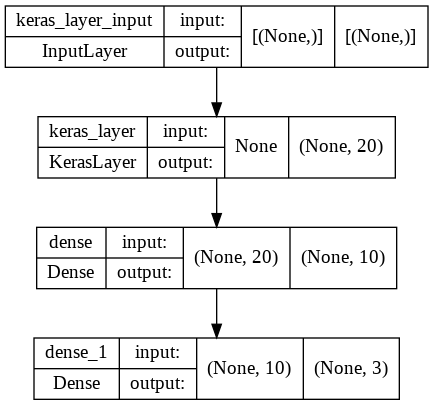

In [ ]:
tf.keras.utils.plot_model(model, "simpleNN_model.png", show_shapes=True)

In [ ]:
history1 = model1.fit(train_ds.shuffle(1000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


141/141 [==============================] - 5s 7ms/step - loss: 1.9833 - categorical_accuracy: 0.3480 - val_loss: 1.5515 - val_categorical_accuracy: 0.3929
Epoch 2/20
141/141 [==============================] - 1s 6ms/step - loss: 1.4732 - categorical_accuracy: 0.3559 - val_loss: 1.3292 - val_categorical_accuracy: 0.4118
Epoch 3/20
141/141 [==============================] - 1s 6ms/step - loss: 1.2722 - categorical_accuracy: 0.3928 - val_loss: 1.2122 - val_categorical_accuracy: 0.4005
Epoch 4/20
141/141 [==============================] - 1s 6ms/step - loss: 1.1816 - categorical_accuracy: 0.4071 - val_loss: 1.1498 - val_categorical_accuracy: 0.4003
Epoch 5/20
141/141 [==============================] - 1s 6ms/step - loss: 1.1351 - categorical_accuracy: 0.4125 - val_loss: 1.1160 - val_categorical_accuracy: 0.4023
Epoch 6/20
141/141 [==============================] - 1s 6ms/step - loss: 1.1092 - categorical_accuracy: 0.4209 - val_loss: 1.0981 - val_categorical_accuracy: 0.4119
Epoch 7/20
141/

In [ ]:
model1 = tf.keras.Sequential()
model1.add(hub_layer)
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(10, activation='relu',kernel_regularizer=regularizers.l2(0.05)))
model1.add(tf.keras.layers.Dropout(0.5))
model1.add(tf.keras.layers.Dense(3,activation='sigmoid',kernel_regularizer=regularizers.l2(0.05)))



model1.summary()
model1.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='adam', metrics=["CategoricalAccuracy"])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                389380    
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 389,623
Trainable params: 389,623
Non-trainable params: 0
_________________________________________________________________


In [ ]:
epochs = 20

# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs)
#history1 = model.fit(train_ds.shuffle(2000).batch(128),epochs= epochs,validation_data = valid_ds.batch(128),verbose=1)

Epoch 1/20


TypeError: ignored

In [ ]:
epochs = 60

In [ ]:
history1 = model1.fit(train_ds.shuffle(1000).batch(128),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(128),
                    verbose=1)

Epoch 1/60
141/141 [==============================] - 2s 13ms/step - loss: 1.0130 - categorical_accuracy: 0.5193 - val_loss: 0.9786 - val_categorical_accuracy: 0.5450
Epoch 2/60
141/141 [==============================] - 1s 6ms/step - loss: 1.0019 - categorical_accuracy: 0.5321 - val_loss: 0.9705 - val_categorical_accuracy: 0.5545
Epoch 3/60
141/141 [==============================] - 1s 6ms/step - loss: 0.9900 - categorical_accuracy: 0.5356 - val_loss: 0.9631 - val_categorical_accuracy: 0.5535
Epoch 4/60
141/141 [==============================] - 1s 6ms/step - loss: 0.9915 - categorical_accuracy: 0.5357 - val_loss: 0.9594 - val_categorical_accuracy: 0.5563
Epoch 5/60
141/141 [==============================] - 1s 6ms/step - loss: 0.9885 - categorical_accuracy: 0.5396 - val_loss: 0.9552 - val_categorical_accuracy: 0.5701
Epoch 6/60
141/141 [==============================] - 1s 6ms/step - loss: 0.9807 - categorical_accuracy: 0.5481 - val_loss: 0.9490 - val_categorical_accuracy: 0.5799
Epo

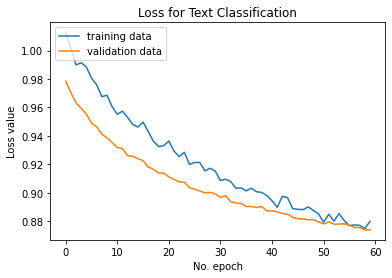

In [ ]:
plt.plot(history1.history['loss'], label='training data')
plt.plot(history1.history['val_loss'], label='validation data')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(history1.history['CategoricalAccuracy'],label='training data')
plt.plot(history1.history['val_CategoricalAccuracy'],label='validation data')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

KeyError: ignored

In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = model1.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = model1.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
108/108 [==============================] - 1s 5ms/step - loss: 0.8606 - categorical_accuracy: 0.6628
test loss, test acc: [0.8606448769569397, 0.6627839207649231]
Generate predictions for all samples
[[0.47983775 0.6302622  0.36639187]
 [0.20938009 0.49058494 0.7805559 ]
 [0.71869004 0.6249788  0.1747493 ]
 ...
 [0.67129606 0.62613404 0.20891456]
 [0.21227619 0.49346194 0.7755795 ]
 [0.1830374  0.46303916 0.8242752 ]]


In [ ]:
print(predict_results)

[1 2 0 ... 0 2 2]


In [ ]:
test_data['pred_sentiment']= predict_results
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == 0),'negative',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '1'),'neutral',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '2'),'positive',test_data.pred_sentiment)

In [ ]:
test_data.head(20)

,textID,text,sentiment,Num_words_text,pred_sentiment
0,f87dea47db,last session,neutral,6,neutral
1,96d74cb729,shanghai also really exciting precisely skyscr...,positive,15,positive
2,eee518ae67,recession veronique branquinho quit company su...,negative,13,negative
4,33987a8ee5,like,positive,5,neutral
5,726e501993,thats great weee visitors,positive,4,positive
6,261932614e,think everyone hates here,negative,8,negative
7,afa11da83f,soooooo wish could school myspace completely b...,negative,13,neutral
8,e64208b4ef,within short time last clue them,neutral,12,neutral
9,37bcad24ca,what alright havent done anything leaving soon...,neutral,18,neutral
10,24c92644a4,bike holdshould have known that argh total bummer,negative,12,neutral


In [ ]:
from sklearn.metrics import classification_report
labels = ['positive', 'negative','neutral']
    
print(classification_report(test_data['sentiment'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

    positive       0.78      0.70      0.73      1075
    negative       0.77      0.44      0.56       983
     neutral       0.57      0.79      0.67      1376

    accuracy                           0.66      3434
   macro avg       0.71      0.64      0.65      3434
weighted avg       0.69      0.66      0.66      3434



In [ ]:
model1.save('/content/outputtf_model')

INFO:tensorflow:Assets written to: /content/outputtf_model/assets


INFO:tensorflow:Assets written to: /content/outputtf_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/outputtf_model')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 20)                389380    
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_3 (Dense)             (None, 3)                 33        
                                                                 
Total params: 389,623
Trainable params: 389,623
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = new_model.evaluate(x_test,test_labels)
print("test loss, test acc:", results)


# Generate predictions (probabilities -- the output of the last layer)
# on test  data using `predict`
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Evaluate on test data
 16/108 [===>..........................] - ETA: 0s - loss: 0.8575 - categorical_accuracy: 0.6816 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


108/108 [==============================] - 1s 3ms/step - loss: 0.8606 - categorical_accuracy: 0.6628
test loss, test acc: [0.8606448769569397, 0.6627839207649231]
Generate predictions for all samples
[[0.47983775 0.6302622  0.36639187]
 [0.20938009 0.49058494 0.7805559 ]
 [0.71869004 0.6249788  0.1747493 ]
 ...
 [0.67129606 0.62613404 0.20891456]
 [0.21227619 0.49346194 0.7755795 ]
 [0.1830374  0.46303916 0.8242752 ]]


In [ ]:
test_data['pred_sentiment']= predict_results
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == 0),'negative',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '1'),'neutral',test_data.pred_sentiment)
test_data['pred_sentiment'] = np.where((test_data.pred_sentiment == '2'),'positive',test_data.pred_sentiment)

In [ ]:
labels = ['positive', 'negative','neutral']
    
print(classification_report(test_data['sentiment'].tolist(),test_data['pred_sentiment'].tolist(),labels=labels))

              precision    recall  f1-score   support

    positive       0.78      0.70      0.73      1075
    negative       0.77      0.44      0.56       983
     neutral       0.57      0.79      0.67      1376

    accuracy                           0.66      3434
   macro avg       0.71      0.64      0.65      3434
weighted avg       0.69      0.66      0.66      3434

